# Load Data
Load the `proposal_logs_2.csv` file into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np

# Load the CSV file, using the first column from the CSV as the DataFrame index.
df = pd.read_csv('proposal_logs_2.csv', index_col=False)

# Display the first few rows of the corrected DataFrame
print(df.head())

   storativity  young_modulus  init_stress_x  init_stress_y  perm_k0  \
0      -23.160         15.762         20.480         17.552  -46.714   
1      -20.149         19.908         20.719         17.856  -47.278   
2      -25.468         26.163         19.244         16.147  -51.852   
3      -32.278         23.022         19.137         13.694  -37.483   
4      -20.753         22.196         19.285         14.161  -36.519   

   perm_eps  perm_delta  perm_gamma   V1_0     V1_1  ...  H1_16  H1_17  H1_18  \
0    35.342     -35.790       2.218  275.0  113.235  ...  0.016  0.016  0.016   
1    48.679     -35.577       1.479  275.0  113.237  ...  0.235  0.235  0.235   
2     2.008     -37.816       2.928  275.0  113.236  ...  0.175  0.175  0.175   
3    35.099     -34.521       2.384  275.0  113.357  ...  1.229  1.229  1.229   
4     3.785     -37.728       2.732  275.0  113.237  ...  0.218  0.218  0.218   

   H1_19  H1_20  H1_21  H1_22  H1_23  H1_24  H1_25  
0  0.016  0.016  0.016  0.0

# Plot Histograms
Generate histograms for each column in the DataFrame to visualize data distributions.

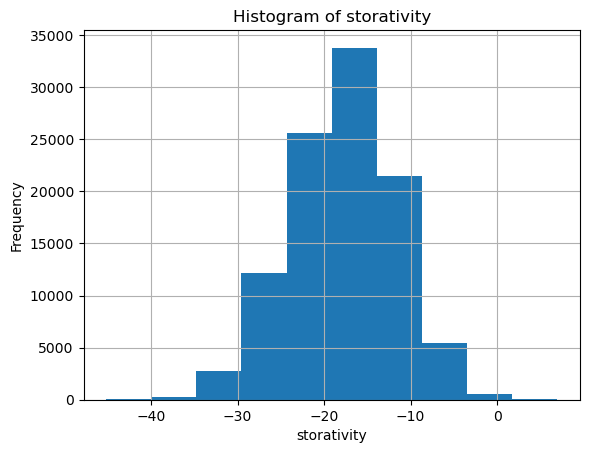

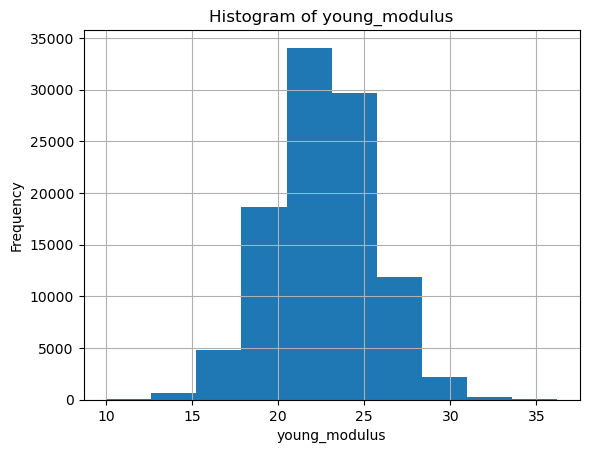

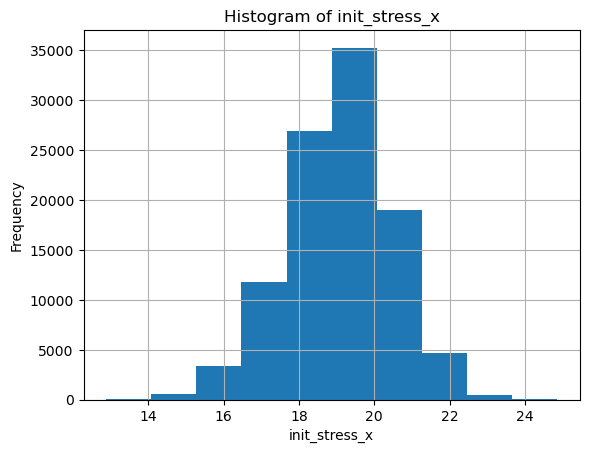

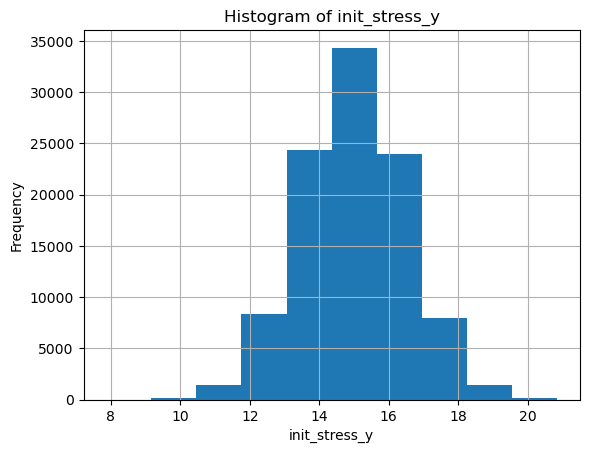

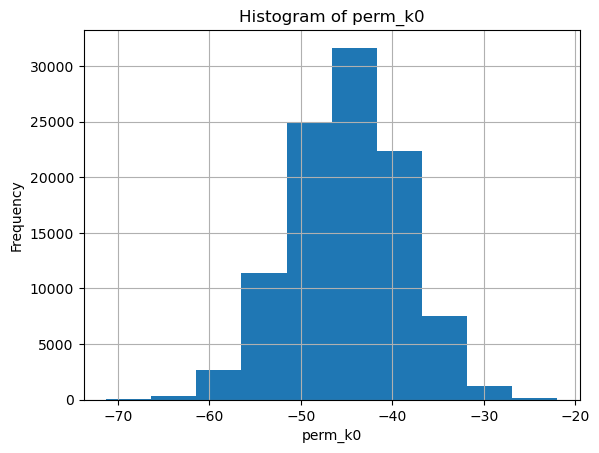

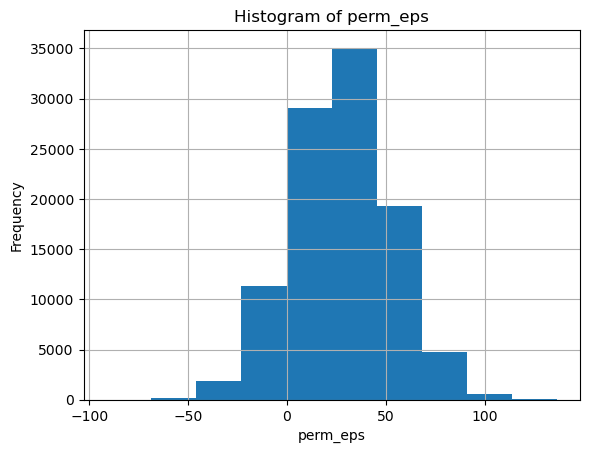

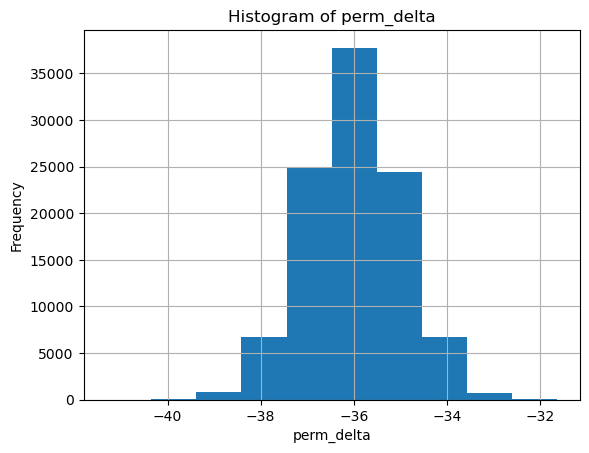

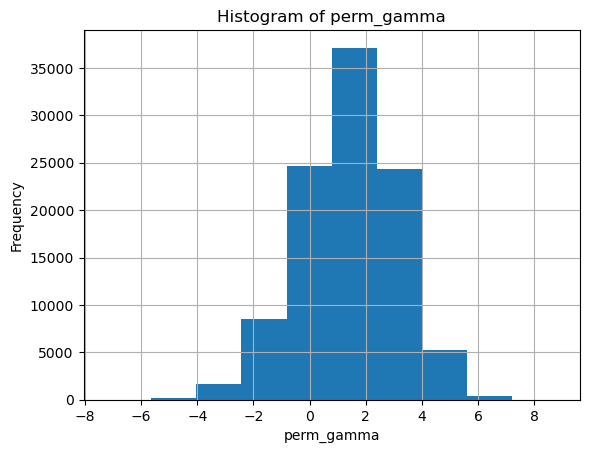

In [2]:
import matplotlib.pyplot as plt

# Iterate over each column and plot a histogram
for column in df.columns[:8]:
    plt.figure()
    df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Extract inputs and outputs

In [3]:
inputs_matrix = df.iloc[:, :8].values.astype(np.float32)
outputs_matrix = df.iloc[:, 8:].values.astype(np.float32)

# Plot some data outputs

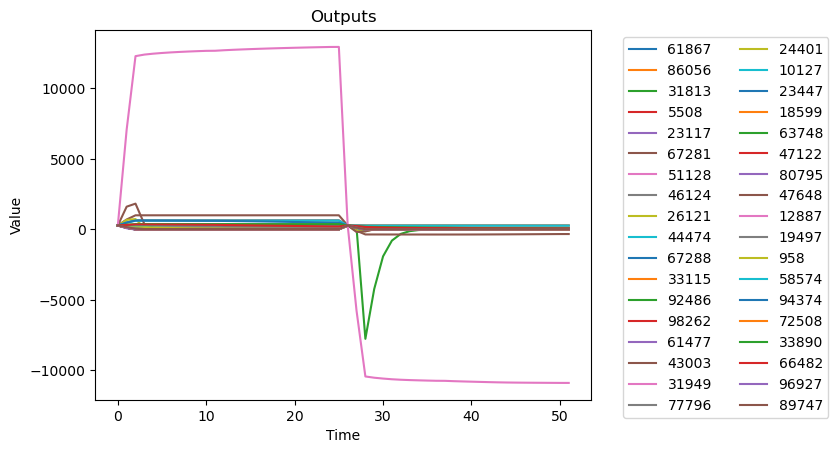

In [4]:
max_n = inputs_matrix.shape[0]

idx_to_plot =  np.random.choice(max_n, 36, replace=False)

plt.figure()
for idx in idx_to_plot:
    plt.plot(outputs_matrix[idx,:], label=f'{idx}')
plt.title('Outputs')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

# Save to HDF5
Save the DataFrame to an HDF5 file with maximal compression.

In [5]:
import h5py
# Save to an HDF5 file with maximal compression
# numpy matrices input_matrix and output_matrix

filename = 'proposal_logs_2.h5'
with h5py.File(filename, 'w') as f:
    f.create_dataset('inputs', data=inputs_matrix, compression='gzip', compression_opts=9)
    f.create_dataset('outputs', data=outputs_matrix, compression='gzip', compression_opts=9)